In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter

In [25]:
ratings = pd.read_csv("ml-100k/u.data" , sep = '\t' , usecols=range(3) , names=['user_id' , 'movie_id' , 'rating'])

In [26]:
ratings.head()

,user_id,movie_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [27]:
cols = [0,1,] + [var for var in range(5,5+19)]
print(cols)
print(len(cols))

[0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
21


In [28]:
col_names =['movie_id',
          'title',
          'unknown',
          'Action',
          'Adventure',
          'Animation',
          'Childrens',
          'Comedy',
          'Crime',
          'Documentary',
          'Drama',
          'Fantasy',
          'Film-Noir',
          'Horror',
          'Musical',
          'Mystery',
          'Romance',
          'Sci-Fi',
          'Thriller',
          'War',
          'Western',]


In [29]:
movie = pd.read_csv("ml-100k/u.item",usecols=cols,names=col_names,sep='|',encoding='latin')

In [30]:
movie.head()

,movie_id,title,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
print(movie.shape)
print(ratings.shape)



(1682, 21)
(100003, 3)


In [33]:
ratings =ratings.groupby('movie_id').agg({'user_id': np.size,'rating' : np.mean})

In [34]:
ratings.columns = ['size' , 'avg_rating']

In [35]:
ratings.head(50)

,size,avg_rating
movie_id,,
1,452,3.878319
2,131,3.206107
3,90,3.033333
4,209,3.550239
5,86,3.302326
6,26,3.576923
7,392,3.798469
8,219,3.995434
9,299,3.896321


In [36]:
minimum = min(ratings['size'])
maximum = max(ratings['size'])
ratings['popularity'] = ratings['size'].apply(lambda x:(x-minimum)/(maximum-minimum))
ratings.head()

,size,avg_rating,popularity
movie_id,,,
1,452,3.878319,0.773585
2,131,3.206107,0.222985
3,90,3.033333,0.152659
4,209,3.550239,0.356775
5,86,3.302326,0.145798


In [37]:
ratings.reset_index(level=0,inplace=True)

In [38]:
ratings.head()

,movie_id,size,avg_rating,popularity
0,1,452,3.878319,0.773585
1,2,131,3.206107,0.222985
2,3,90,3.033333,0.152659
3,4,209,3.550239,0.356775
4,5,86,3.302326,0.145798


In [39]:
df = pd.merge(ratings,movie,on='movie_id')

In [40]:
df.head()


,movie_id,size,avg_rating,popularity,title,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,452,3.878319,0.773585,Toy Story (1995),0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,131,3.206107,0.222985,GoldenEye (1995),0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,90,3.033333,0.152659,Four Rooms (1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,209,3.550239,0.356775,Get Shorty (1995),0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,86,3.302326,0.145798,Copycat (1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
df.index = df['movie_id']
df.drop('movie_id' , axis=1 , inplace=True)
df.head()

,size,avg_rating,popularity,title,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,
1,452,3.878319,0.773585,Toy Story (1995),0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,131,3.206107,0.222985,GoldenEye (1995),0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,90,3.033333,0.152659,Four Rooms (1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,209,3.550239,0.356775,Get Shorty (1995),0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,86,3.302326,0.145798,Copycat (1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
from scipy.spatial.distance import cosine
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

In [43]:
def getDistance(movie_id1,movie_id2):
    pop_dis = abs(df.loc[movie_id1,'popularity']-df.loc[movie_id2,'popularity'])
    genre_dis = cosine(
        list(df.loc[movie_id1,'unknown':'Western']),
        list(df.loc[movie_id2,'unknown':'Western'])
       )
    return pop_dis+genre_dis

In [44]:
def getNeighbours(movie_id1,k=5):
    distance = [(movie_id2,getDistance(movie_id1,movie_id2)) for movie_id2 in df.index  if movie_id2 != movie_id1 ]
    distance.sort(key=itemgetter(1))
    return [ distance[i][0] for i in range(k) ]

In [45]:
getNeighbours(50,5)

[181, 172, 121, 222, 174]

In [87]:
def similarMovie(movie_id,k=5):
    sim = getNeighbours(movie_id,k)
    fig, ax = plt.subplots(figsize=(6,2), dpi= 80)
    a=[[1,2,3,4,5,6,7,8,9,10],sim]
    a_T=np.array(a).T.tolist()
    b=pd.DataFrame(a_T,columns=['Movie','Similarity'])
    sns.barplot(x='Movie',y='Similarity',data=b)
    plt.title('Movie vs Similarity plot')
    plt.show()
    #print(sim)
    print(f"{k} Nearest Movies to  {df.loc[movie_id,'title']}")
    print("Sr.No\tRatings\tMovie Name")
    c = 1
    for movie in sim : 
          print(f"{c}.\t{df.loc[movie,'avg_rating']:.2f}\t{df.loc[movie,'title']}")
          c += 1

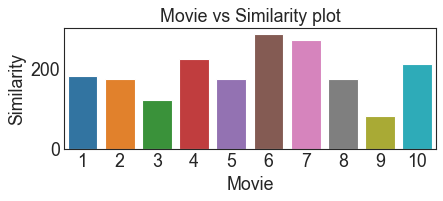

10 Nearest Movies to  Star Wars (1977)
Sr.No	Ratings	Movie Name
1.	4.01	Return of the Jedi (1983)
2.	4.21	Empire Strikes Back, The (1980)
3.	3.44	Independence Day (ID4) (1996)
4.	3.66	Star Trek: First Contact (1996)
5.	4.25	Raiders of the Lost Ark (1981)
6.	3.66	English Patient, The (1996)
7.	3.23	Starship Troopers (1997)
8.	4.17	Princess Bride, The (1987)
9.	3.72	Jurassic Park (1993)
10.	3.93	Indiana Jones and the Last Crusade (1989)


In [88]:
similarMovie(50,10)